# SPOTIFY MUSIC ANALYSIS

## PART 1: EXPLORATORY DATA ANALYSIS (EDA)

###  SECTION 1: SETUP AND IMPORTS

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### SECTION 2: LOAD AND EXPLORE DATA

In [2]:
# File path
file_path = 'Spotify Extended Streaming History/Streaming_History_Audio_2024-2025.json'

In [3]:
# Load the json file
with open (file_path, 'r', encoding = 'utf-8') as file:
    data = json.load(file)

In [4]:
# Display basic info
print(f'Total Records : {len(data)}')
print(json.dumps(data[0],indent = 2))

Total Records : 2732
{
  "ts": "2024-04-24T07:59:57Z",
  "platform": "android",
  "ms_played": 3560,
  "conn_country": "US",
  "ip_addr": "24.143.99.87",
  "master_metadata_track_name": "Adhareeni",
  "master_metadata_album_artist_name": "A.R. Rahman",
  "master_metadata_album_album_name": "Sivaji",
  "spotify_track_uri": "spotify:track:5khLRcjWa3n5OjzY3RJbQe",
  "episode_name": null,
  "episode_show_name": null,
  "spotify_episode_uri": null,
  "audiobook_title": null,
  "audiobook_uri": null,
  "audiobook_chapter_uri": null,
  "audiobook_chapter_title": null,
  "reason_start": "playbtn",
  "reason_end": "endplay",
  "shuffle": true,
  "skipped": true,
  "offline": false,
  "offline_timestamp": 1713945602,
  "incognito_mode": false
}


In [5]:
# Convert to DataFrame
df = pd.DataFrame(data)
print(f'Shape : {df.shape}')
print(f'\nColumn names : {df.columns.to_list()}')

Shape : (2732, 23)

Column names : ['ts', 'platform', 'ms_played', 'conn_country', 'ip_addr', 'master_metadata_track_name', 'master_metadata_album_artist_name', 'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name', 'episode_show_name', 'spotify_episode_uri', 'audiobook_title', 'audiobook_uri', 'audiobook_chapter_uri', 'audiobook_chapter_title', 'reason_start', 'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp', 'incognito_mode']


In [6]:
# Display first few rows
df.head()

,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_uri,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2024-04-24T07:59:57Z,android,3560,US,24.143.99.87,Adhareeni,A.R. Rahman,Sivaji,spotify:track:5khLRcjWa3n5OjzY3RJbQe,None,...,None,None,None,playbtn,endplay,True,True,False,1713945602,False
1,2024-04-24T08:02:00Z,android,92520,US,24.143.99.87,None,None,None,None,Chapter 1: What is Data Science?,...,None,None,None,clickrow,logout,False,False,False,1713945640,False
2,2024-04-26T13:31:05Z,android,7280,US,24.143.99.87,"Manamariyunnolu - From ""Porinju Mariam Jose""",Vijay Yesudas,Manamariyunnolu,spotify:track:0NhZAkTPCRrt8IJd04IVOw,None,...,None,None,None,playbtn,fwdbtn,True,True,False,1714138247,False
3,2024-04-26T13:31:07Z,android,1956,US,24.143.99.87,Paadam Pootha Kaalam - Male Version,Kannur Rajan,Chithram,spotify:track:6F4iGeqlQvOFnSxviyw4y1,None,...,None,None,None,fwdbtn,fwdbtn,True,True,False,1714138308,False
4,2024-04-26T13:31:09Z,android,1670,US,24.143.99.87,Allimalar Kaavil,M. G. Radhakrishnan,Mithunam,spotify:track:2IgM9TTSJKTqyYYZvXGcip,None,...,None,None,None,fwdbtn,fwdbtn,True,True,False,1714138310,False


In [7]:
# Display data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2732 entries, 0 to 2731
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   ts                                 2732 non-null   object
 1   platform                           2732 non-null   object
 2   ms_played                          2732 non-null   int64 
 3   conn_country                       2732 non-null   object
 4   ip_addr                            2732 non-null   object
 5   master_metadata_track_name         2727 non-null   object
 6   master_metadata_album_artist_name  2727 non-null   object
 7   master_metadata_album_album_name   2727 non-null   object
 8   spotify_track_uri                  2727 non-null   object
 9   episode_name                       5 non-null      object
 10  episode_show_name                  5 non-null      object
 11  spotify_episode_uri                5 non-null      object
 12  audiob

In [8]:
# Convert timestamp to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Check the date range
print(f"Earliest date : {df['ts'].min()}")
print(f"Latest date : {df['ts'].max()}")
print(f"Total span : {df['ts'].max() - df['ts'].min()}")

Earliest date : 2024-04-24 07:59:57+00:00
Latest date : 2025-12-31 00:27:13+00:00
Total span : 615 days 16:27:16


### SECTION 3: DATA CLEANING - FILTER SONGS ONLY

In [9]:
# Check null values
df.isnull().sum()

ts                                      0
platform                                0
ms_played                               0
conn_country                            0
ip_addr                                 0
master_metadata_track_name              5
master_metadata_album_artist_name       5
master_metadata_album_album_name        5
spotify_track_uri                       5
episode_name                         2727
episode_show_name                    2727
spotify_episode_uri                  2727
audiobook_title                      2732
audiobook_uri                        2732
audiobook_chapter_uri                2732
audiobook_chapter_title              2732
reason_start                            0
reason_end                              0
shuffle                                 0
skipped                                 0
offline                                 0
offline_timestamp                       0
incognito_mode                          0
dtype: int64

In [10]:
# Rows where episode_name is not null
(df[df['episode_name'].notna()])

,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_uri,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
1,2024-04-24 08:02:00+00:00,android,92520,US,24.143.99.87,None,None,None,None,Chapter 1: What is Data Science?,...,None,None,None,clickrow,logout,False,False,False,1713945640,False
735,2025-01-14 18:59:51+00:00,android,0,US,24.143.99.87,None,None,None,None,Billions Club Live with The Weeknd: A Concert ...,...,None,None,None,unknown,endplay,False,True,False,1736881191,False
737,2025-01-14 19:00:25+00:00,android,8220,US,24.143.99.87,None,None,None,None,Chapter 1: What is Data Science?,...,None,None,None,clickrow,endplay,False,True,False,1736881204,False
738,2025-01-14 19:00:41+00:00,android,4680,US,24.143.99.87,None,None,None,None,Chapter 1: What is Data Science?,...,None,None,None,clickrow,endplay,False,True,False,1736881225,False
2700,2025-12-17 20:11:28+00:00,android,11474,US,2601:1c0:577e:7b00:f4f5:ae74:3b52:5607,None,None,None,None,Recent Data Science Graduates: Storytelling Th...,...,None,None,None,unknown,endplay,False,True,False,1766002276,False


In [11]:
# Drop podcast/audibook columns
columns = ['episode_name', 'episode_show_name', 'spotify_episode_uri', 'audiobook_title', 'audiobook_uri', 'audiobook_chapter_uri',
          'audiobook_chapter_title']
df = df.drop(columns = columns)

In [12]:
print(f"\nShape after dropping podcast columns: {df.shape}")


Shape after dropping podcast columns: (2732, 16)


In [13]:
# Remove rows with null track names
songs_only = df[df['master_metadata_track_name'].notna()]
print(f'Total songs : {len(songs_only)}')

print("\nNull values after filtering:")
print(songs_only.isnull().sum())

Total songs : 2727

Null values after filtering:
ts                                   0
platform                             0
ms_played                            0
conn_country                         0
ip_addr                              0
master_metadata_track_name           0
master_metadata_album_artist_name    0
master_metadata_album_album_name     0
spotify_track_uri                    0
reason_start                         0
reason_end                           0
shuffle                              0
skipped                              0
offline                              0
offline_timestamp                    0
incognito_mode                       0
dtype: int64


### SECTION 4: SELECT RELEVANT COLUMNS

In [14]:
columns = ['ts', 'ms_played', 'master_metadata_track_name', 
                   'master_metadata_album_artist_name', 'master_metadata_album_album_name', 
                   'skipped', 'spotify_track_uri']

songs_only = songs_only[columns]

print(f"Shape: {songs_only.shape}")
print(f"\nColumns: {songs_only.columns.tolist()}")

Shape: (2727, 7)

Columns: ['ts', 'ms_played', 'master_metadata_track_name', 'master_metadata_album_artist_name', 'master_metadata_album_album_name', 'skipped', 'spotify_track_uri']


In [15]:
# Sample data
songs_only.head()

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,skipped,spotify_track_uri
0,2024-04-24 07:59:57+00:00,3560,Adhareeni,A.R. Rahman,Sivaji,True,spotify:track:5khLRcjWa3n5OjzY3RJbQe
2,2024-04-26 13:31:05+00:00,7280,"Manamariyunnolu - From ""Porinju Mariam Jose""",Vijay Yesudas,Manamariyunnolu,True,spotify:track:0NhZAkTPCRrt8IJd04IVOw
3,2024-04-26 13:31:07+00:00,1956,Paadam Pootha Kaalam - Male Version,Kannur Rajan,Chithram,True,spotify:track:6F4iGeqlQvOFnSxviyw4y1
4,2024-04-26 13:31:09+00:00,1670,Allimalar Kaavil,M. G. Radhakrishnan,Mithunam,True,spotify:track:2IgM9TTSJKTqyYYZvXGcip
5,2024-04-26 13:31:10+00:00,1783,Kakkothi,Balu,Chathikkatha Chandhu,True,spotify:track:1DxCvkUh38bAtHeLTJsM9O


### SECTION 5: RENAME COLUMNS FOR CLARITY

In [16]:
songs_only = songs_only.rename(columns={
    'master_metadata_track_name': 'track_name',
    'master_metadata_album_artist_name': 'artist_name',
    'master_metadata_album_album_name': 'album_name',
    'spotify_track_uri': 'track_id'
})
print(songs_only.columns.tolist())

['ts', 'ms_played', 'track_name', 'artist_name', 'album_name', 'skipped', 'track_id']


In [17]:
print(f"Total songs: {len(songs_only)}")
print(f"Unique tracks: {songs_only['track_id'].nunique()}")
print(f"Duplicate plays: {len(songs_only) - songs_only['track_id'].nunique()}")

Total songs: 2727
Unique tracks: 789
Duplicate plays: 1938


### SECTION 6: PREPARE DATASET FOR TEMPORAL ANALYSIS

In [18]:
# Full dataset for trend analysis
songs_full = songs_only.copy()
print(f"Full dataset shape: {songs_full.shape}")

Full dataset shape: (2727, 7)


### SECTION 7: TIMEZONE CONVERSION - UTC TO PACIFIC TIME

In [19]:
# Convert to Pacific Time first
songs_full['ts_pacific'] = songs_full['ts'].dt.tz_convert('America/Los_Angeles')

# Extract ALL time components from Pacific Time
songs_full['date'] = songs_full['ts_pacific'].dt.date
songs_full['hour'] = songs_full['ts_pacific'].dt.hour
songs_full['day_of_week'] = songs_full['ts_pacific'].dt.day_name()
songs_full['month_year'] = songs_full['ts_pacific'].dt.strftime('%B %Y')

# Drop the old UTC ts column and rename Pacific ts
songs_full = songs_full.drop(columns=['ts'])
songs_full = songs_full.rename(columns={'ts_pacific': 'ts'})

# Sample data
songs_full.head()

,ms_played,track_name,artist_name,album_name,skipped,track_id,ts,date,hour,day_of_week,month_year
0,3560,Adhareeni,A.R. Rahman,Sivaji,True,spotify:track:5khLRcjWa3n5OjzY3RJbQe,2024-04-24 00:59:57-07:00,2024-04-24,0,Wednesday,April 2024
2,7280,"Manamariyunnolu - From ""Porinju Mariam Jose""",Vijay Yesudas,Manamariyunnolu,True,spotify:track:0NhZAkTPCRrt8IJd04IVOw,2024-04-26 06:31:05-07:00,2024-04-26,6,Friday,April 2024
3,1956,Paadam Pootha Kaalam - Male Version,Kannur Rajan,Chithram,True,spotify:track:6F4iGeqlQvOFnSxviyw4y1,2024-04-26 06:31:07-07:00,2024-04-26,6,Friday,April 2024
4,1670,Allimalar Kaavil,M. G. Radhakrishnan,Mithunam,True,spotify:track:2IgM9TTSJKTqyYYZvXGcip,2024-04-26 06:31:09-07:00,2024-04-26,6,Friday,April 2024
5,1783,Kakkothi,Balu,Chathikkatha Chandhu,True,spotify:track:1DxCvkUh38bAtHeLTJsM9O,2024-04-26 06:31:10-07:00,2024-04-26,6,Friday,April 2024


### SECTION 8: DATA UNDERSTANDING - KEY STATISTICS

In [20]:
# Calculate total hours listened
total_ms = songs_full['ms_played'].sum()
total_hours = total_ms / (1000 * 60 * 60)
total_days = total_hours / 24

print(f"Total milliseconds: {total_ms:,}")
print(f"Total hours listened: {total_hours:.2f} hours")
print(f"Total days equivalent: {total_days:.2f} days")
print(f"Total months (in hours): {total_hours / 730:.2f} months")

# Average per day
avg_hours_per_day = total_hours / (songs_full['ts'].dt.date.nunique())
print(f"\nAverage listening per day: {avg_hours_per_day:.2f} hours")

# Average per track
avg_ms_per_track = songs_full['ms_played'].mean()
avg_minutes_per_track = avg_ms_per_track / (1000 * 60)
print(f"Average duration per track: {avg_minutes_per_track:.2f} minutes")

# Number of unique days you used Spotify
unique_days_used = songs_full['ts'].dt.date.nunique()

print(f"\nDays Listened: {unique_days_used} days")
print(f"Percentage: {(unique_days_used/577)*100:.1f}%")

Total milliseconds: 590,509,596
Total hours listened: 164.03 hours
Total days equivalent: 6.83 days
Total months (in hours): 0.22 months

Average listening per day: 0.90 hours
Average duration per track: 3.61 minutes

Days Listened: 182 days
Percentage: 31.5%


## PART 2: TEMPORAL ANALYSIS

#### LISTENING FREQUENCY OVER TIME (MONTHLY)

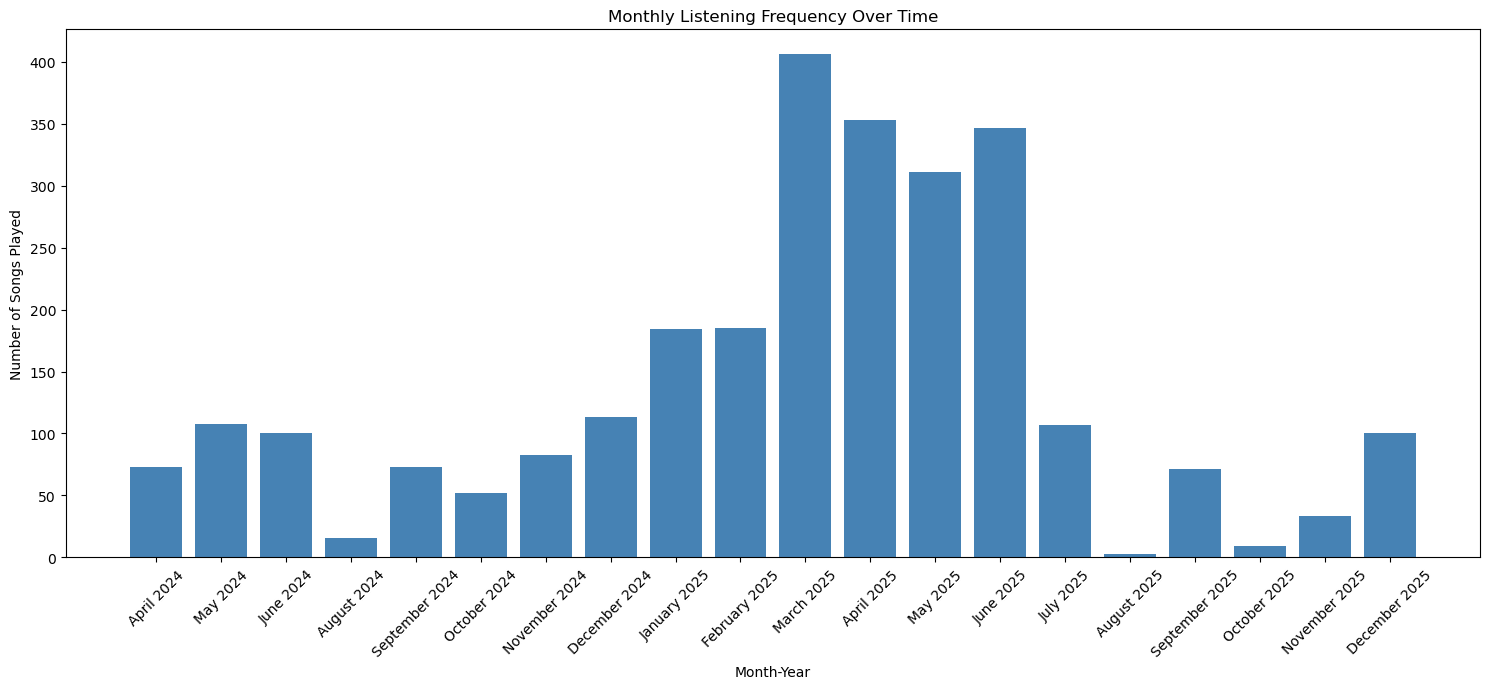

Average songs per month: 136.35
Peak month: March 2025 with 406 songs
Lowest month: August 2025 with 3 songs


In [21]:
# Monthly listening frequency
monthly_listens = songs_full.groupby('month_year').size()

# Sort by converting to datetime just for ordering
monthly_listens = monthly_listens.reindex(
    pd.to_datetime(monthly_listens.index, format='%B %Y').sort_values().strftime('%B %Y')
)

plt.figure(figsize=(15, 7))
plt.bar(range(len(monthly_listens)), monthly_listens.values, color='steelblue')
plt.title('Monthly Listening Frequency Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Songs Played')
plt.xticks(range(len(monthly_listens)), monthly_listens.index, rotation=45)
plt.tight_layout()
plt.show()

print(f"Average songs per month: {monthly_listens.mean():.2f}")
print(f"Peak month: {monthly_listens.idxmax()} with {monthly_listens.max()} songs")
print(f"Lowest month: {monthly_listens.idxmin()} with {monthly_listens.min()} songs")

In [22]:
print("Songs played each month:\n")
for month, count in monthly_listens.items():
    print(f"{month}: {count} songs")

Songs played each month:

April 2024: 73 songs
May 2024: 108 songs
June 2024: 100 songs
August 2024: 16 songs
September 2024: 73 songs
October 2024: 52 songs
November 2024: 83 songs
December 2024: 113 songs
January 2025: 184 songs
February 2025: 185 songs
March 2025: 406 songs
April 2025: 353 songs
May 2025: 311 songs
June 2025: 347 songs
July 2025: 107 songs
August 2025: 3 songs
September 2025: 71 songs
October 2025: 9 songs
November 2025: 33 songs
December 2025: 100 songs


#### MOST PLAYED ARTISTS OVER TIME

Top 10 Most Played Artists (Overall):

1. One Direction: 116 plays
2. Pritam: 111 plays
3. Harris Jayaraj: 107 plays
4. A.R. Rahman: 94 plays
5. Vidyasagar: 87 plays
6. Shaan Rahman: 82 plays
7. Atif Aslam: 70 plays
8. Sid Sriram: 57 plays
9. Ed Sheeran: 57 plays
10. Anirudh Ravichander: 55 plays


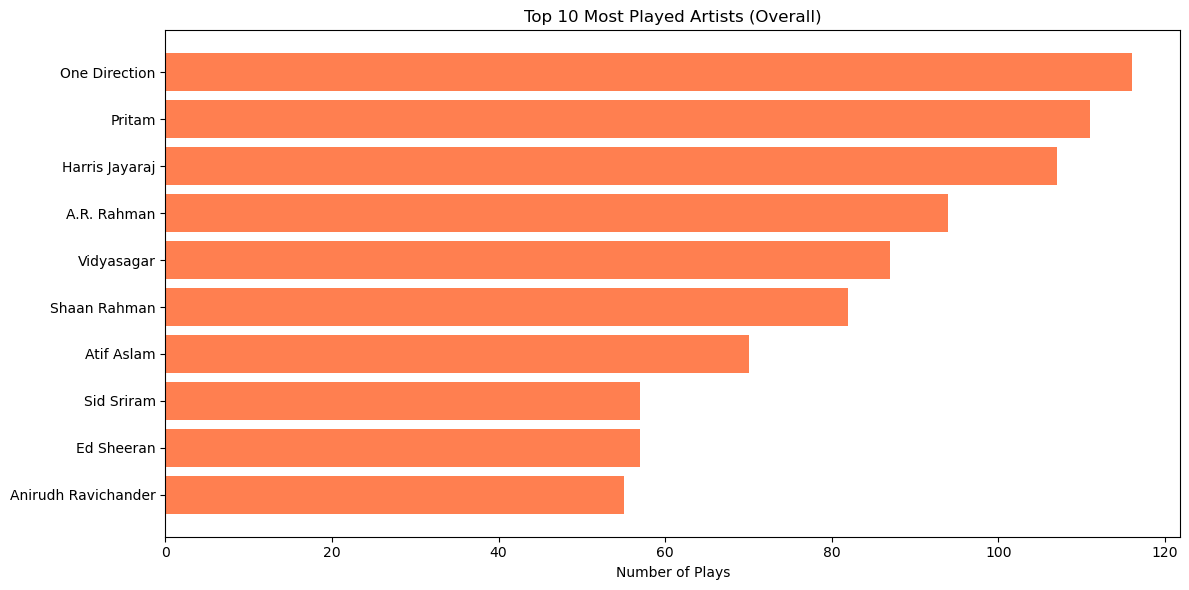

In [23]:
# Top 10 artists overall
top_artists = songs_full['artist_name'].value_counts().head(10)

print("Top 10 Most Played Artists (Overall):\n")
for i, (artist, count) in enumerate(top_artists.items(), 1):
    print(f"{i}. {artist}: {count} plays")

# Visualize
plt.figure(figsize=(12, 6))
plt.barh(range(len(top_artists)), top_artists.values, color='coral')
plt.yticks(range(len(top_artists)), top_artists.index)
plt.xlabel('Number of Plays')
plt.title('Top 10 Most Played Artists (Overall)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [24]:
# Top 10 artists in 2024 vs 2025
songs_2024 = songs_full[songs_full['ts'].dt.year == 2024]
songs_2025 = songs_full[songs_full['ts'].dt.year == 2025]

# Top 10 artists in 2024
top_artists_2024 = songs_2024['artist_name'].value_counts().head(10)

# Top 10 artists in 2025
top_artists_2025 = songs_2025['artist_name'].value_counts().head(10)

print("Top 10 Artists in 2024:\n")
for i, (artist, count) in enumerate(top_artists_2024.items(), 1):
    print(f"{i}. {artist}: {count} plays")

print("\n" + "="*50 + "\n")

print("Top 10 Artists in 2025:\n")
for i, (artist, count) in enumerate(top_artists_2025.items(), 1):
    print(f"{i}. {artist}: {count} plays")

Top 10 Artists in 2024:

1. K. J. Yesudas: 29 plays
2. Harris Jayaraj: 25 plays
3. Shaan Rahman: 23 plays
4. A.R. Rahman: 20 plays
5. Sushin Shyam: 18 plays
6. Sid Sriram: 17 plays
7. K. S. Chithra: 17 plays
8. One Direction: 16 plays
9. Pritam: 15 plays
10. Shankar Mahadevan: 15 plays


Top 10 Artists in 2025:

1. One Direction: 100 plays
2. Pritam: 96 plays
3. Harris Jayaraj: 82 plays
4. Vidyasagar: 79 plays
5. A.R. Rahman: 74 plays
6. Shaan Rahman: 59 plays
7. Atif Aslam: 58 plays
8. Ed Sheeran: 54 plays
9. Anirudh Ravichander: 50 plays
10. Deepak Dev: 45 plays


#### TIME OF DAY PATTERNS

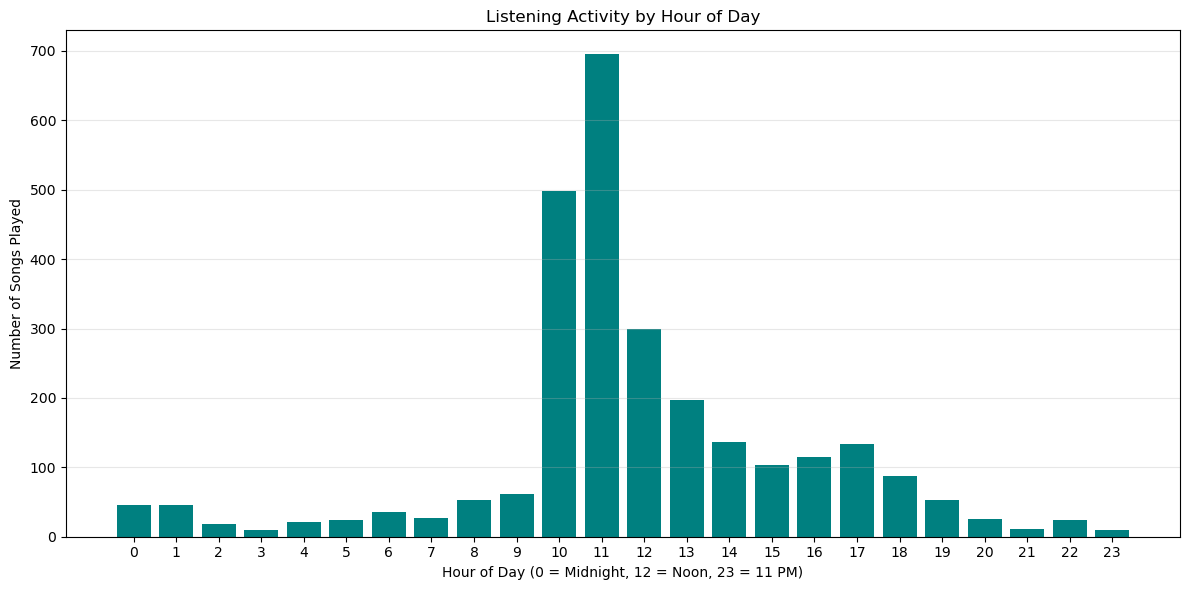

Morning (6-11 AM): 1370 songs
Afternoon (12-5 PM): 984 songs
Evening (6-11 PM): 210 songs
Night (12-5 AM): 163 songs


In [25]:
# Combined data
hourly_listens = songs_full.groupby('hour').size()

plt.figure(figsize=(12, 6))
plt.bar(hourly_listens.index, hourly_listens.values, color='teal')
plt.title('Listening Activity by Hour of Day')
plt.xlabel('Hour of Day (0 = Midnight, 12 = Noon, 23 = 11 PM)')
plt.ylabel('Number of Songs Played')
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Morning (6-11 AM): {hourly_listens[6:12].sum()} songs")
print(f"Afternoon (12-5 PM): {hourly_listens[12:18].sum()} songs")
print(f"Evening (6-11 PM): {hourly_listens[18:24].sum()} songs")
print(f"Night (12-5 AM): {hourly_listens[0:6].sum()} songs")

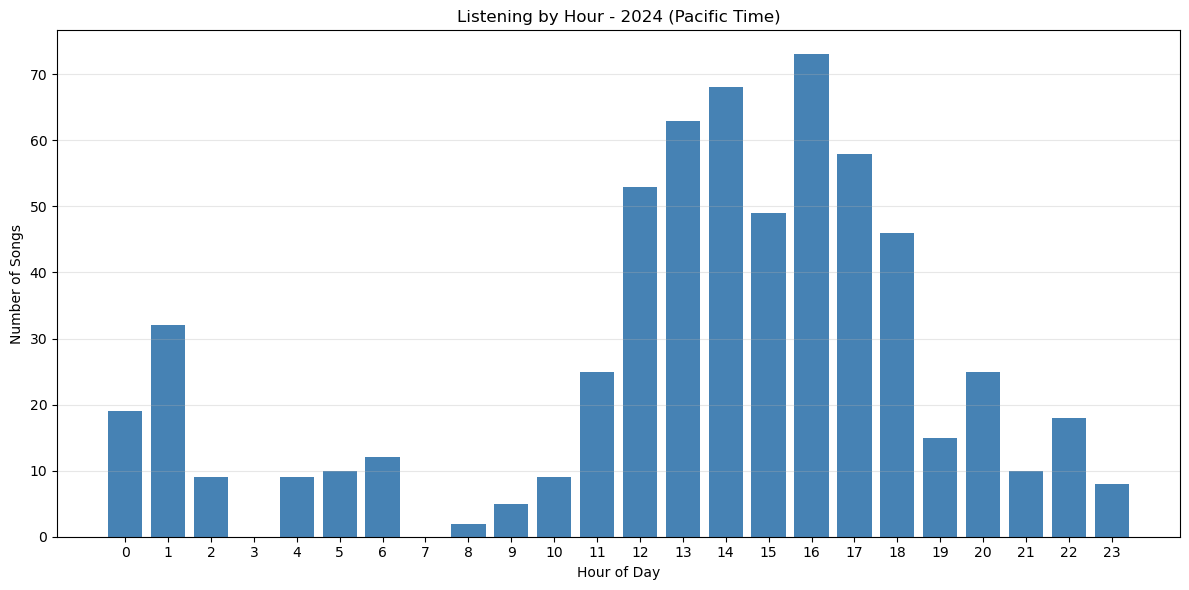


2024 by time of day:
Morning (6-11 AM): 53 songs
Afternoon (12-5 PM): 364 songs
Evening (6-11 PM): 122 songs


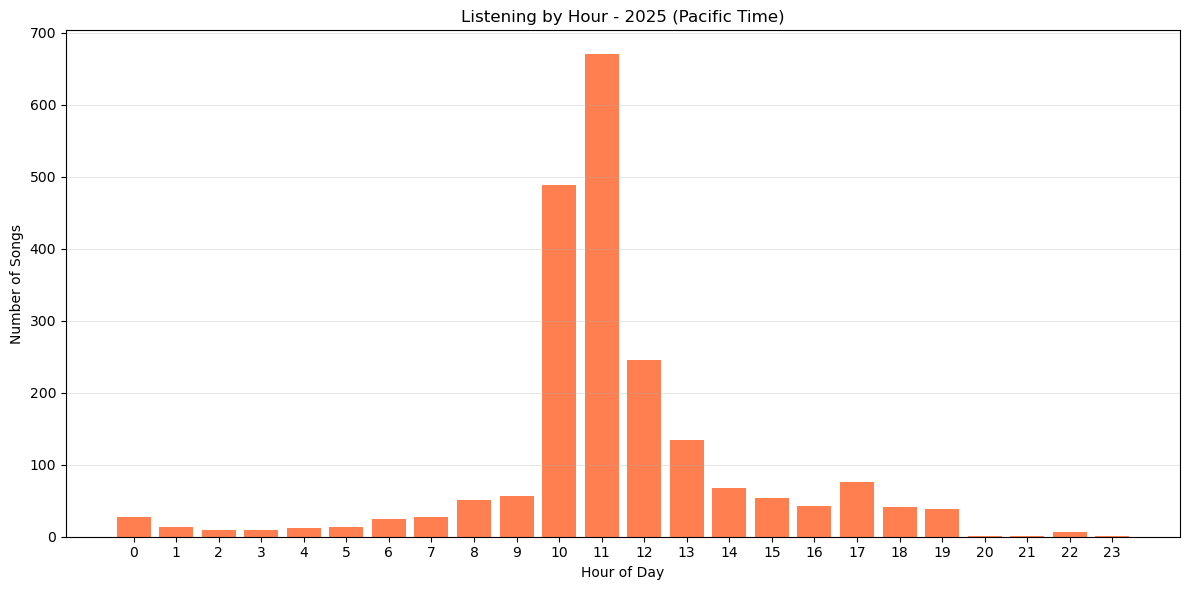


2025 by time of day:
Morning (6-11 AM): 1317 songs
Afternoon (12-5 PM): 620 songs
Evening (6-11 PM): 88 songs


In [26]:
# Hour patterns for 2024
hourly_2024 = songs_2024.groupby('hour').size()

plt.figure(figsize=(12, 6))
plt.bar(hourly_2024.index, hourly_2024.values, color='steelblue')
plt.title('Listening by Hour - 2024 (Pacific Time)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Songs')
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n2024 by time of day:")
print(f"Morning (6-11 AM): {hourly_2024[hourly_2024.index.isin(range(6,12))].sum()} songs")
print(f"Afternoon (12-5 PM): {hourly_2024[hourly_2024.index.isin(range(12,18))].sum()} songs")
print(f"Evening (6-11 PM): {hourly_2024[hourly_2024.index.isin(range(18,24))].sum()} songs")

# Hour patterns for 2025
hourly_2025 = songs_2025.groupby('hour').size()

plt.figure(figsize=(12, 6))
plt.bar(hourly_2025.index, hourly_2025.values, color='coral')
plt.title('Listening by Hour - 2025 (Pacific Time)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Songs')
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n2025 by time of day:")
print(f"Morning (6-11 AM): {hourly_2025[hourly_2025.index.isin(range(6,12))].sum()} songs")
print(f"Afternoon (12-5 PM): {hourly_2025[hourly_2025.index.isin(range(12,18))].sum()} songs")
print(f"Evening (6-11 PM): {hourly_2025[hourly_2025.index.isin(range(18,24))].sum()} songs")

#### DAY OF WEEK PATTERNS

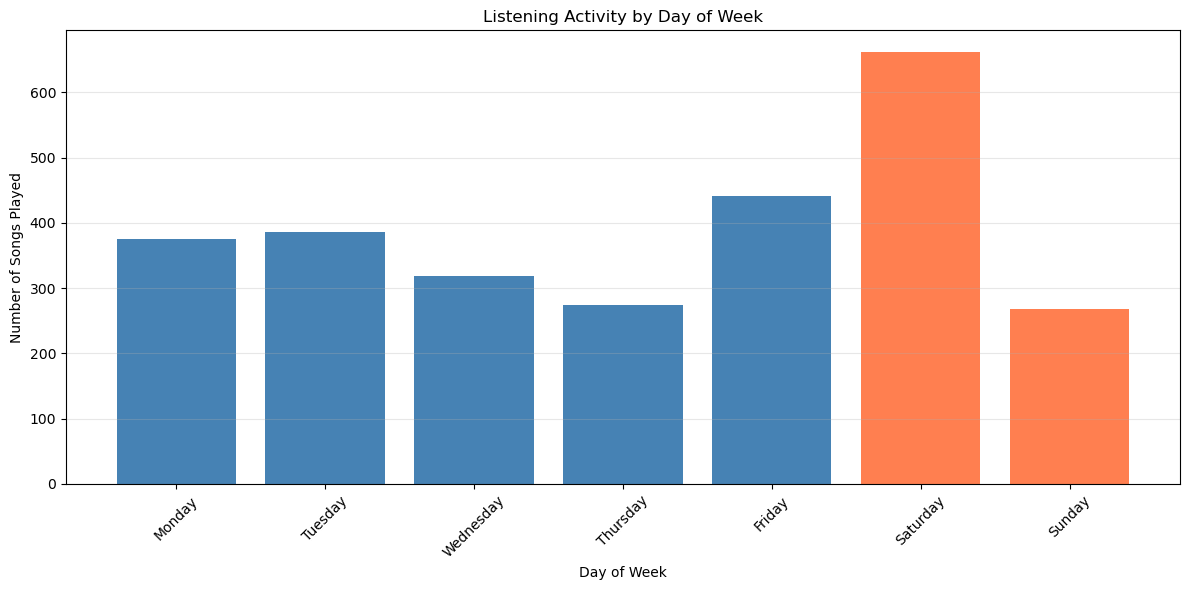

Songs played by day of week:

Monday: 376 songs
Tuesday: 386 songs
Wednesday: 319 songs
Thursday: 275 songs
Friday: 441 songs
Saturday: 662 songs
Sunday: 268 songs

Weekday average (Mon-Fri): 359 songs
Weekend average (Sat-Sun): 465 songs


In [27]:
# Combined data
daily_listens = songs_full.groupby('day_of_week').size()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_listens = daily_listens.reindex(day_order)

plt.figure(figsize=(12, 6))
colors = ['steelblue']*5 + ['coral']*2  # Blue for weekdays, coral for weekends
plt.bar(range(len(daily_listens)), daily_listens.values, color=colors)
plt.title('Listening Activity by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Songs Played')
plt.xticks(range(len(daily_listens)), day_order, rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Songs played by day of week:\n")
for day, count in daily_listens.items():
    print(f"{day}: {count} songs")

print(f"\nWeekday average (Mon-Fri): {daily_listens['Monday':'Friday'].mean():.0f} songs")
print(f"Weekend average (Sat-Sun): {daily_listens['Saturday':'Sunday'].mean():.0f} songs")

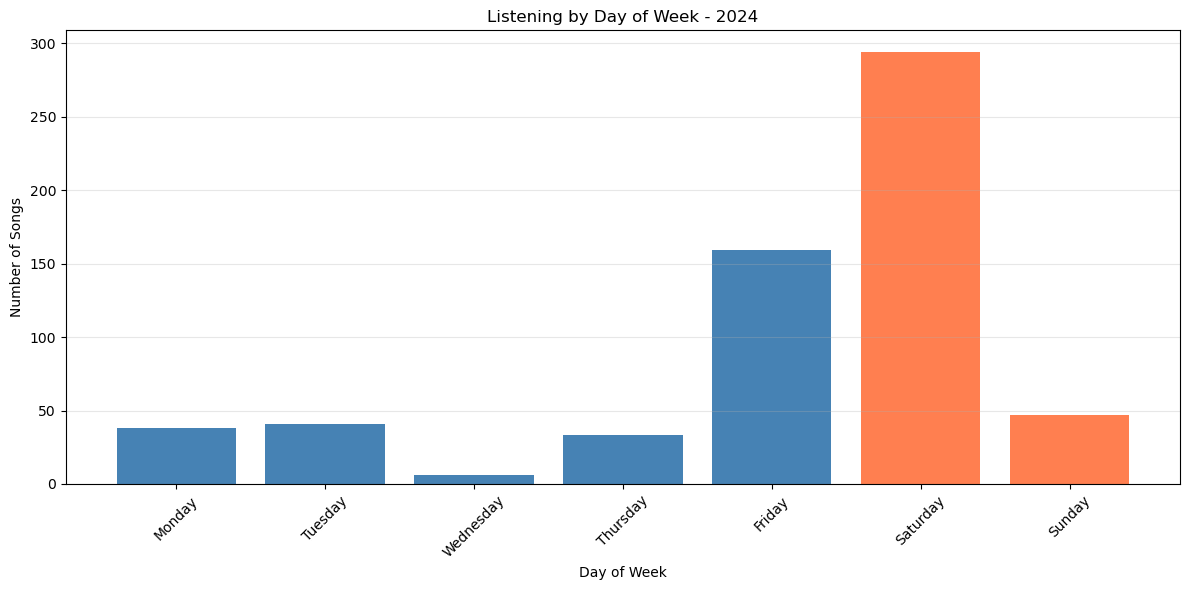


2024 by day of week:
Monday: 38 songs
Tuesday: 41 songs
Wednesday: 6 songs
Thursday: 33 songs
Friday: 159 songs
Saturday: 294 songs
Sunday: 47 songs


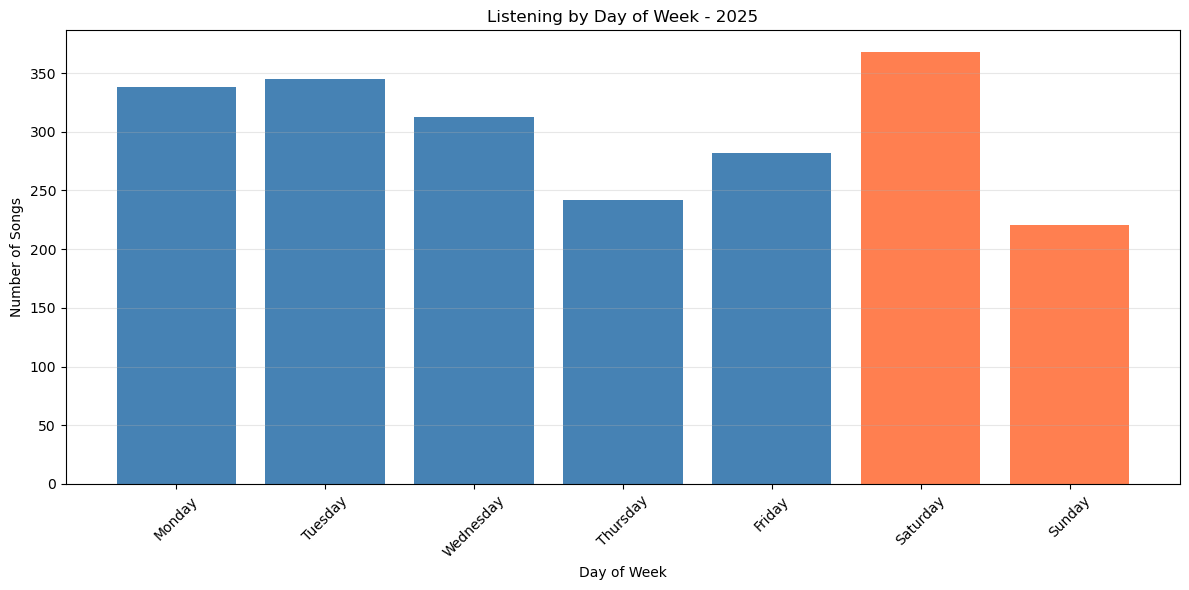


2025 by day of week:
Monday: 338 songs
Tuesday: 345 songs
Wednesday: 313 songs
Thursday: 242 songs
Friday: 282 songs
Saturday: 368 songs
Sunday: 221 songs


In [28]:
# Day of week patterns for 2024
daily_2024 = songs_2024.groupby('day_of_week').size()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_2024 = daily_2024.reindex(day_order)

colors = ['steelblue']*5 + ['coral']*2

plt.figure(figsize=(12, 6))
plt.bar(range(len(daily_2024)), daily_2024.values, color=colors)
plt.title('Listening by Day of Week - 2024')
plt.xlabel('Day of Week')
plt.ylabel('Number of Songs')
plt.xticks(range(len(daily_2024)), day_order, rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n2024 by day of week:")
for day, count in daily_2024.items():
    print(f"{day}: {count} songs")

# Day of week patterns for 2025
daily_2025 = songs_2025.groupby('day_of_week').size()

daily_2025 = daily_2025.reindex(day_order)

plt.figure(figsize=(12, 6))
plt.bar(range(len(daily_2025)), daily_2025.values, color=colors)
plt.title('Listening by Day of Week - 2025')
plt.xlabel('Day of Week')
plt.ylabel('Number of Songs')
plt.xticks(range(len(daily_2025)), day_order, rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n2025 by day of week:")
for day, count in daily_2025.items():
    print(f"{day}: {count} songs")

#### MUSIC TASTE EVOLUTION OVER TIME

In [29]:
# Get top artists for first 6 months (Apr-Sep 2024)
period_1 = songs_full[(songs_full['ts'].dt.year == 2024) & (songs_full['ts'].dt.month <= 9)]
top_artists_p1 = period_1['artist_name'].value_counts().head(5)

# Get top artists for second 6 months (Oct 2024-Mar 2025)
period_2 = songs_full[((songs_full['ts'].dt.year == 2024) & (songs_full['ts'].dt.month >= 10)) | 
                       ((songs_full['ts'].dt.year == 2025) & (songs_full['ts'].dt.month <= 3))]
top_artists_p2 = period_2['artist_name'].value_counts().head(5)

# Get top artists for third 6 months (Apr-Sep 2025)
period_3 = songs_full[(songs_full['ts'].dt.year == 2025) & (songs_full['ts'].dt.month >= 4) & (songs_full['ts'].dt.month <= 9)]
top_artists_p3 = period_3['artist_name'].value_counts().head(5)

# Get top artists for last period (Oct-Dec 2025)
period_4 = songs_full[(songs_full['ts'].dt.year == 2025) & (songs_full['ts'].dt.month >= 10)]
top_artists_p4 = period_4['artist_name'].value_counts().head(5)

print("Top 5 Artists - Period 1 (Apr-Sep 2024):")
for i, (artist, count) in enumerate(top_artists_p1.items(), 1):
    print(f"{i}. {artist}: {count} plays")

print("\nTop 5 Artists - Period 2 (Oct 2024-Mar 2025):")
for i, (artist, count) in enumerate(top_artists_p2.items(), 1):
    print(f"{i}. {artist}: {count} plays")

print("\nTop 5 Artists - Period 3 (Apr-Sep 2025):")
for i, (artist, count) in enumerate(top_artists_p3.items(), 1):
    print(f"{i}. {artist}: {count} plays")

print("\nTop 5 Artists - Period 4 (Oct-Dec 2025):")
for i, (artist, count) in enumerate(top_artists_p4.items(), 1):
    print(f"{i}. {artist}: {count} plays")

Top 5 Artists - Period 1 (Apr-Sep 2024):
1. K. J. Yesudas: 23 plays
2. Harris Jayaraj: 16 plays
3. A.R. Rahman: 15 plays
4. Shaan Rahman: 14 plays
5. Vineeth Sreenivasan: 12 plays

Top 5 Artists - Period 2 (Oct 2024-Mar 2025):
1. Pritam: 54 plays
2. One Direction: 52 plays
3. Vidyasagar: 47 plays
4. Harris Jayaraj: 42 plays
5. Shaan Rahman: 37 plays

Top 5 Artists - Period 3 (Apr-Sep 2025):
1. One Direction: 55 plays
2. Pritam: 52 plays
3. Harris Jayaraj: 47 plays
4. A.R. Rahman: 44 plays
5. Atif Aslam: 40 plays

Top 5 Artists - Period 4 (Oct-Dec 2025):
1. One Direction: 9 plays
2. Harry Styles: 6 plays
3. SEVENTEEN: 5 plays
4. Ed Sheeran: 4 plays
5. Lakhinandan Lahon: 4 plays


#### SKIP PATTERNS OVER TIME

Skip Patterns Over Time:

Period 1 (Apr-Sep 2024): 87 skipped out of 370 = 23.5% skip rate
Period 2 (Oct 2024-Mar 2025): 173 skipped out of 1023 = 16.9% skip rate
Period 3 (Apr-Sep 2025): 104 skipped out of 1192 = 8.7% skip rate
Period 4 (Oct-Dec 2025): 27 skipped out of 142 = 19.0% skip rate


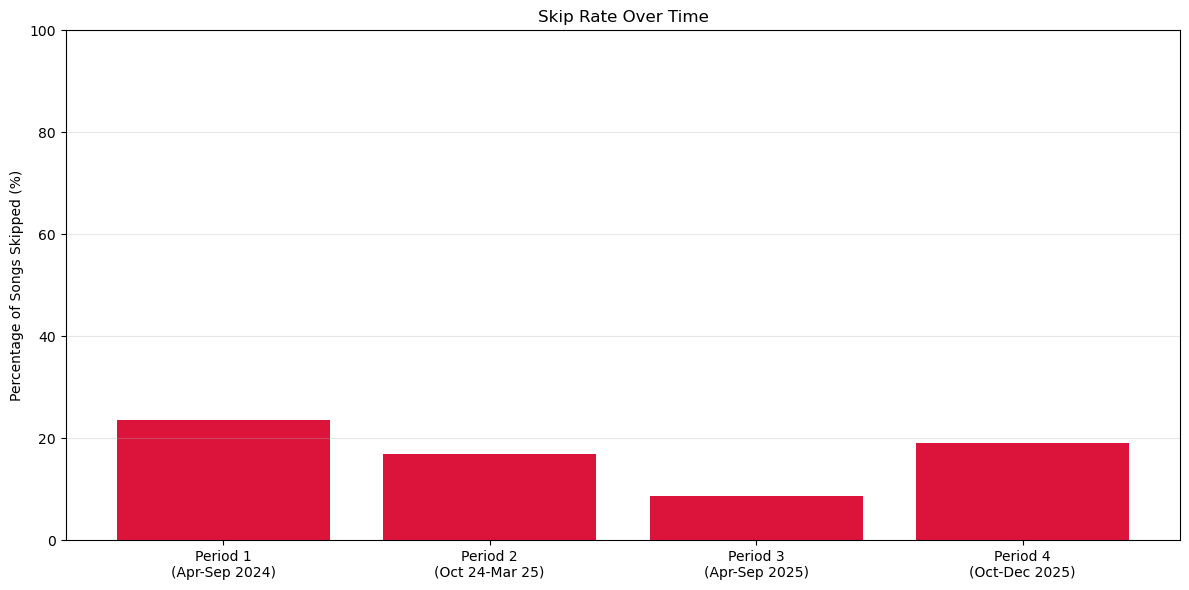

In [30]:
# Skip patterns for each period
skip_p1 = period_1[period_1['skipped'] == True].shape[0]
skip_p2 = period_2[period_2['skipped'] == True].shape[0]
skip_p3 = period_3[period_3['skipped'] == True].shape[0]
skip_p4 = period_4[period_4['skipped'] == True].shape[0]

total_p1 = period_1.shape[0]
total_p2 = period_2.shape[0]
total_p3 = period_3.shape[0]
total_p4 = period_4.shape[0]

print("Skip Patterns Over Time:\n")
print(f"Period 1 (Apr-Sep 2024): {skip_p1} skipped out of {total_p1} = {(skip_p1/total_p1)*100:.1f}% skip rate")
print(f"Period 2 (Oct 2024-Mar 2025): {skip_p2} skipped out of {total_p2} = {(skip_p2/total_p2)*100:.1f}% skip rate")
print(f"Period 3 (Apr-Sep 2025): {skip_p3} skipped out of {total_p3} = {(skip_p3/total_p3)*100:.1f}% skip rate")
print(f"Period 4 (Oct-Dec 2025): {skip_p4} skipped out of {total_p4} = {(skip_p4/total_p4)*100:.1f}% skip rate")

# Visualization
periods = ['Period 1\n(Apr-Sep 2024)', 'Period 2\n(Oct 24-Mar 25)', 'Period 3\n(Apr-Sep 2025)', 'Period 4\n(Oct-Dec 2025)']
skip_rates = [(skip_p1/total_p1)*100, (skip_p2/total_p2)*100, (skip_p3/total_p3)*100, (skip_p4/total_p4)*100]

plt.figure(figsize=(12, 6))
plt.bar(periods, skip_rates, color='crimson')
plt.title('Skip Rate Over Time')
plt.ylabel('Percentage of Songs Skipped (%)')
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

#### MOST LISTENED TRACKS EACH PERIOD

In [31]:
print("Most Listened Tracks - Period 1 (Apr-Sep 2024):")
top_tracks_p1 = period_1['track_name'].value_counts().head(5)
for i, (track, count) in enumerate(top_tracks_p1.items(), 1):
    print(f"{i}. {track}: {count} plays")

print("\nMost Listened Tracks - Period 2 (Oct 2024-Mar 2025):")
top_tracks_p2 = period_2['track_name'].value_counts().head(5)
for i, (track, count) in enumerate(top_tracks_p2.items(), 1):
    print(f"{i}. {track}: {count} plays")

print("\nMost Listened Tracks - Period 3 (Apr-Sep 2025):")
top_tracks_p3 = period_3['track_name'].value_counts().head(5)
for i, (track, count) in enumerate(top_tracks_p3.items(), 1):
    print(f"{i}. {track}: {count} plays")

print("\nMost Listened Tracks - Period 4 (Oct-Dec 2025):")
top_tracks_p4 = period_4['track_name'].value_counts().head(5)
for i, (track, count) in enumerate(top_tracks_p4.items(), 1):
    print(f"{i}. {track}: {count} plays")

Most Listened Tracks - Period 1 (Apr-Sep 2024):
1. Nila Paithale (From "Olympian Anthony Aadam") - Male Vocals: 3 plays
2. Oru Kaathilola: 3 plays
3. Allimalar Kaavil: 3 plays
4. Uyiril Thodum (From "Kumbalangi Nights"): 3 plays
5. Thoomanju - From "18am Padi": 3 plays

Most Listened Tracks - Period 2 (Oct 2024-Mar 2025):
1. Perfect: 15 plays
2. Oru Kaathilola: 14 plays
3. Kamini: 13 plays
4. Uyire: 11 plays
5. Aaraadhike: 10 plays

Most Listened Tracks - Period 3 (Apr-Sep 2025):
1. Perfect: 16 plays
2. Happier: 13 plays
3. Love Me Like You Do: 10 plays
4. Dusk Till Dawn (feat. Sia) - Radio Edit: 10 plays
5. See You Again (feat. Charlie Puth): 10 plays

Most Listened Tracks - Period 4 (Oct-Dec 2025):
1. Perfect: 3 plays
2. Beautiful: 3 plays
3. Style: 2 plays
4. Night Changes: 2 plays
5. Maniac: 2 plays
